# GeeksForGeeks Data Analysis 

## All Imports

In [1]:
import pandas
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### -Importing Dataset

In [2]:
df=pandas.read_csv("medals.csv")

## Exploring The Data

In [3]:
df.columns

Index(['discipline_title', 'slug_game', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [4]:
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [5]:
df.describe()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
count,21697,21697,21697,21697,21697,21697,6584,17027,18073,21697,20195,21697
unique,86,53,1436,4,3,2,493,12116,12895,154,143,154
top,Athletics,tokyo-2020,Individual men,Men,BRONZE,Athlete,United States team,https://olympics.com/en/athletes/michael-phelp...,Michael PHELPS,United States of America,US,USA
freq,3080,1188,215,13932,7529,15113,523,16,16,3094,3094,3094


### -Checking For Possible Values Of Some Columns

In [6]:
# possible values of participant_type
set(df.participant_type)

{'Athlete', 'GameTeam'}

In [7]:
# possible values of event_gender
set(df.event_gender)

{'Men', 'Mixed', 'Open', 'Women'}

In [8]:
# possible values of medal_type
set(df.medal_type)

{'BRONZE', 'GOLD', 'SILVER'}

## Preprocessing The Data

### -Cleaning The Data

In [9]:
# Checking for null values
for i in df.columns:
    if df[i].isnull().any():
        print(i)

participant_title
athlete_url
athlete_full_name
country_code


In [10]:
df['participant_title'].isnull().sum()

15113

In [11]:
df['participant_title'].size

21697

<Axes: >

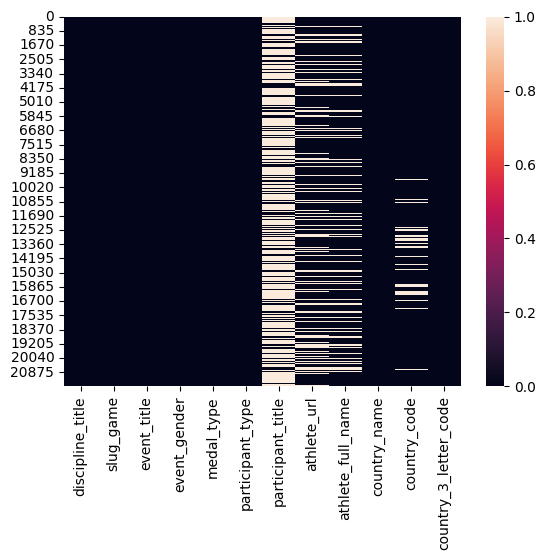

In [12]:
# Checking all null values more clearly
sns.heatmap(df.isnull())
# We can fill up country codes later on as we have 3 letter code, so for now, we will ignore that and fix the others

In [13]:
# common nulls between participant title and athlete full name and athlete url
p_af_url=0
# common nulls between participant title and athlete full name
p_af=0
# common nulls between participant title and athlete url
p_url=0
for i in df.index:
    if str(df['participant_title'][i])=="nan" and str(df['athlete_full_name'][i])=="nan" and str(df['athlete_url'][i])=="nan":
        p_af_url+=1
    elif str(df['participant_title'][i])=="nan" and str(df['athlete_full_name'][i])=="nan":
        p_af+=1
    elif str(df['participant_title'][i])=="nan" and str(df['athlete_url'][i])=="nan":
        p_url+=1  

In [14]:
print(p_af_url)
print(p_url)
print(p_af)

0
888
0


### Filling up blank athlete_full_names with athlete_url

In [15]:
def to_camel_case(text):
    newString=""
    for ind,i in enumerate(text):
        if ind==0:
            newString+=i.upper()
        else:
            newString+=i
    return newString

# Athlete names
for i in df.index:
    athleteUrl=df['athlete_url'][i]
    
#     A reason is given below in the markdown for this
    if type(athleteUrl)!=float and type(df['athlete_full_name'][i])==float:
        
#         Removing unnecessary parts
        athleteUrl=athleteUrl.replace("https://olympics.com/en/athletes/","")
        athleteUrl=athleteUrl.replace("-"," ")
        athleteName=""
#         Working with string cases
        athleteUrl=athleteUrl.split(" ")
#     Camel case
        if len(athleteUrl)==1:
            athleteName=to_camel_case(athleteUrl[0])
        else:
            
            for ind,name in enumerate(athleteUrl):
                if ind==0:
                    athleteName+=to_camel_case(athleteUrl[0])+" "
                else:
#                     Capital case

                    if ind!=len(athleteUrl)-1:
                        athleteName+=name.upper()+" "
                    else:
                        athleteName+=name.upper()
            
#         print(athleteName)
        df['athlete_full_name'][i]=athleteName        


In the above code, we have mentioned a condition like 
```Python
if type(athleteUrl)!=float and type(df['athlete_full_name'][i])==float
```

This suggests that we only want to fill up the athlete names which are not prefilled, and we also want to ignore the NULL urls

In [16]:
# Checking for any single word names (names without title)
for i in df.index:
    if type((df.athlete_full_name[i]))!=float:
        if len(df.athlete_full_name[i].split(" "))==1:
            print(i)
# There are no such values

### Filling up blank participant_titles with athlete_full_name

In [17]:
count=0
for i in df.index:
    a=df.participant_title[i]
    if type(a)!=float:
        print(i," ",a)
        count+=1
#     to only display 10, so that doesn't make issues while reviewing in Github
    if count==10:
        break
        
# We can see , we need to substitude the null values of participant_titles with country name + " team"
# as we dont know whether its a duo or not, or what are their names.

0   Italy
1   Italy
2   Norway
3   Norway
4   Sweden
5   Sweden
6   Great Britain
7   Japan
8   Sweden
9   Sweden


In [18]:
for i in df.index:
    countryN=df.country_name[i]
    if type(countryN)!=float and type(df.participant_title[i])==float:
        df.participant_title[i]=countryN+" team"

#     Also filling the rows which have country names but not the word "team"
    if type(countryN)!=float:
        if df.participant_title[i]!=float and "/" not in df.participant_title[i] and "team" not in df.participant_title[i]:
            df.participant_title[i]+=" team"
        

In [19]:
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [20]:
df['athlete_full_name'].isnull().sum()

3624

<Axes: >

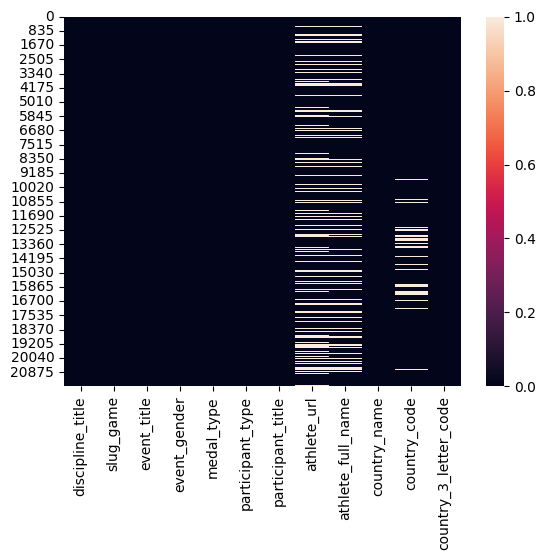

In [21]:
# Using heatmap again to check the progress
sns.heatmap(df.isnull())

### Dropping the athlete_url column

In [22]:
df=df.drop(['athlete_url'],axis=1)

We dont need this column anymore as it can't give any insights to us, it can't be fixed either

### Filling country codes

We can observe , that some country names seem unique while they are not, for example "ROC" and "Republic of China" are same,
so, we need to fill up such values

In [23]:
a=[]
for i in df.index:
    if type(df.country_code[i])==float:
        a.append(df.country_name[i])
print(set(a))

{'Soviet Union', 'Namibia', 'Lebanon', 'West Indies Federation', 'Trinidad and Tobago', 'Bohemia', 'MIX', 'United Arab Republic', 'Australasia', 'Olympic Athletes from Russia', 'Unified Team'}


These country names have either changed or they are no longer a country or it is from a "Mixed" category
So, we should update these values, with proper ones

In [24]:
toBeRemoved=[]
for i in df.index:
    name=df.country_name[i]
    if "ROC" ==name:
        df.country_name[i]="People's Republic of China"
    elif "Russian Federation"==name or "Olympic Athletes from Russia"==name:
        df.country_name[i]="Russia"
    elif "Soviet Union"==name or "Unified Team"==name:
        df.country_code[i]="SU"
    elif "Australasia"==name:
        df.country_name[i]="Australia"
    elif "Trinidad and Tobago"==name:
        df.country_code[i]="TT"
    elif "Namibia" ==name:
        df.country_code[i]="NA"
    elif "Lebanon"==name:
        df.country_code[i]="LB"
    elif "United Arab Republic"==name:
        df.country_name[i]="Egypt"
    elif "Bohemia"==name:
        df.country_name[i]="Czech Republic"
    elif "West Indies Federation"==name or "MIX"==name:
        toBeRemoved.append(i)
    

These indexes should be removed as they can't be fixed

The values are still not fixed , so we need to fix the rest of the values

In [25]:
b=[]
for i in df.index:
    if type(df.country_code[i])==float:
        b.append(df.country_name[i])
b=set(b)

In [26]:
b

{'Australia',
 'Czech Republic',
 'Egypt',
 'MIX',
 'Russia',
 'West Indies Federation'}

In [27]:
# Dropping values and fixing other values
for i in df.index:
    if type(df.country_code[i])==float:
        name=df.country_name[i]
        if name=="Australia":
            df.country_code[i]="AU"
        elif name=="Czech Republic":
            df.country_code[i]="CZ"
        elif name=="Egypt":
            df.country_code[i]="EG"
        elif name=="Russia":
            df.country_code[i]="RU"
        else:
            df.drop(i)

### Checking for Null values again

<Axes: >

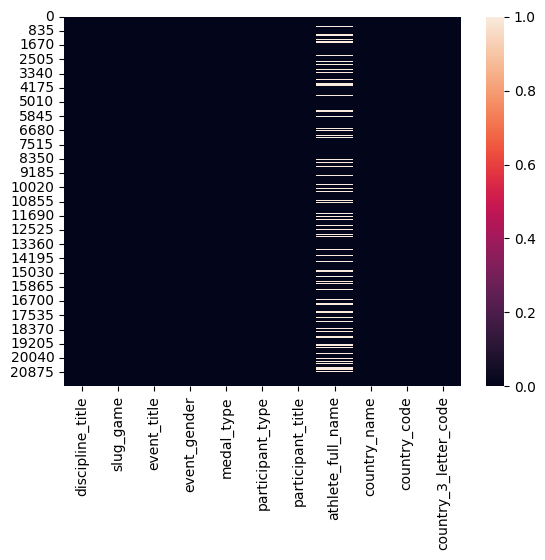

In [28]:
sns.heatmap(df.isnull())

As a final step of removal, we will remove all null athlete full name rows

In [29]:
for i in df.index:
    if type(df.athlete_full_name[i])==float:
        df=df.drop(i)

<Axes: >

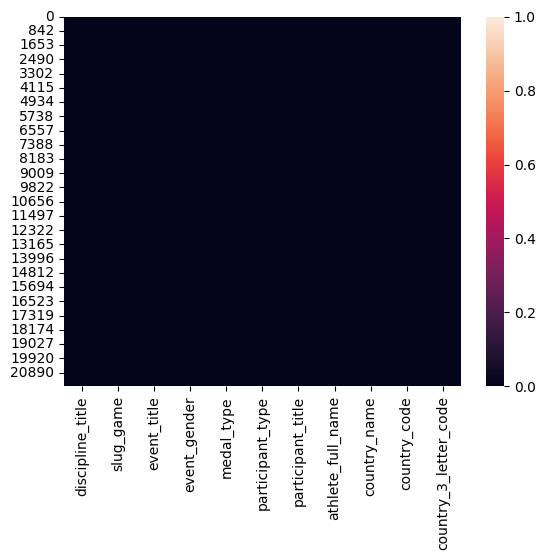

In [30]:
sns.heatmap(df.isnull())

### There are Finally no more NULL values!

### Checking for duplicates

In [31]:
df.duplicated().sum()
# There are no duplicates

0

We can now move to the next part, as there's no more cleaning work to do

## Feature engineering and more preprocessing

### Reindexing the data

In [32]:
df.index

Index([    0,     1,     2,     3,     4,     5,    12,    13,    14,    15,
       ...
       21687, 21688, 21689, 21690, 21691, 21692, 21693, 21694, 21695, 21696],
      dtype='int64', length=18073)

As some points are removed , the indices are still not proper, so we should reindex the data

In [33]:
indexes=[]
for i in range(len(df.index)):
    indexes.append(i)
    
df.index=pandas.Index(indexes)

In [34]:
df.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072],
      dtype='int64', length=18073)

### Adding a new  feature "year"

In [35]:
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,Almida DE VAL,Sweden,SE,SWE


In [36]:
Years=[]
for i in df.index:
    Years.append(int(df['slug_game'][i].split("-")[-1]))

In [37]:
df['years']=Years

In [38]:
for i in sorted(list(set(Years))):
    print(i,end=" ")
# Using " " as an end so its easier to display

1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002 2004 2006 2008 2010 2012 2014 2016 2018 2020 2022 

###  * So the given dataset contains data from `1896 - 2022`

### Merging age data scraped from internet

In [39]:
ageData=pandas.read_csv("finalname_year_age.csv")

In [40]:
ageData.head()

,name,birthyear,age
0,stefania constantini,1999,24.0
1,amos mosaner,1995,28.0
2,kristin skaslien,1986,37.0
3,magnus nedregotten,1990,33.0
4,almida de val,1997,26.0


In [41]:
ageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12116 entries, 0 to 12115
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       12116 non-null  object 
 1   birthyear  12116 non-null  object 
 2   age        11975 non-null  float64
dtypes: float64(1), object(2)
memory usage: 284.1+ KB


In [42]:
ageData.isnull().sum()

name           0
birthyear      0
age          141
dtype: int64

141 null age values

In [43]:
ageData.index

RangeIndex(start=0, stop=12116, step=1)

So, there are about `12116-141=11975` values, we can calculate the nulls as a rough estimate

In [44]:
# Copying the names before changing the orginal data
athleteNames=df['athlete_full_name']

df['athlete_full_name'] = df['athlete_full_name'].apply(lambda x: x.lower())

In [45]:
df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,years
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,stefania constantini,Italy,IT,ITA,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,amos mosaner,Italy,IT,ITA,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,kristin skaslien,Norway,NO,NOR,2022
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,magnus nedregotten,Norway,NO,NOR,2022
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,almida de val,Sweden,SE,SWE,2022


### Merging DF with AgeData

In [46]:
ageData=ageData.rename(columns={'name':'athlete_full_name','birthyear':'birth_year','age':'age'})

df=pandas.merge(df,ageData,on='athlete_full_name', how='left')

In [47]:
df.head(50)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,years,birth_year,age
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,stefania constantini,Italy,IT,ITA,2022,1999,24.0
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,amos mosaner,Italy,IT,ITA,2022,1995,28.0
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,kristin skaslien,Norway,NO,NOR,2022,1986,37.0
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,magnus nedregotten,Norway,NO,NOR,2022,1990,33.0
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,almida de val,Sweden,SE,SWE,2022,1997,26.0
5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,oskar eriksson,Sweden,SE,SWE,2022,1991,32.0
6,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,Canada team,mikael kingsbury,Canada,CA,CAN,2022,1992,31.0
7,Freestyle Skiing,beijing-2022,Men's Moguls,Men,GOLD,Athlete,Sweden team,walter wallberg,Sweden,SE,SWE,2022,NaN,NaN
8,Freestyle Skiing,beijing-2022,Men's Moguls,Men,BRONZE,Athlete,Japan team,ikuma horishima,Japan,JP,JPN,2022,1997,26.0
9,Freestyle Skiing,beijing-2022,Men's Freeski Halfpipe,Men,GOLD,Athlete,New Zealand team,nico porteous,New Zealand,NZ,NZL,2022,2001,22.0


<Axes: >

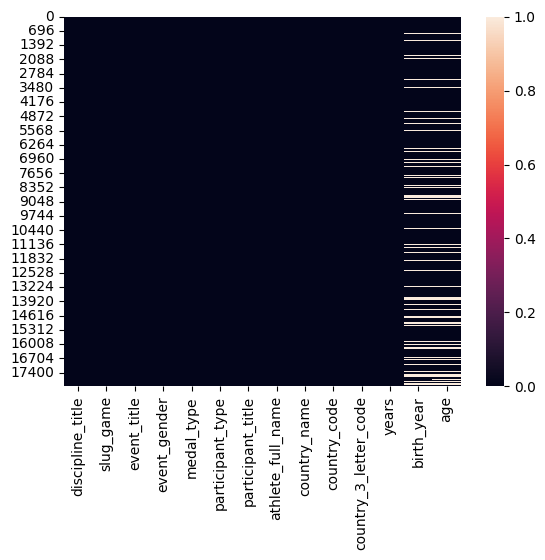

In [48]:
sns.heatmap(df.isnull())

In [49]:
df.query("athlete_full_name == 'almida de val'")
# Just testing a random athlete name

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,years,birth_year,age
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,almida de val,Sweden,SE,SWE,2022,1997,26.0


In [50]:
df['birth_year'].isnull().sum()

3142

almost 3142 values are going to be approximated, as they are null points.
We will take mean, as the measure of approximation

In [51]:
df['birth_year'] = pandas.to_numeric(df['birth_year'], errors='coerce').astype(float)

In [52]:
df.head(10)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_full_name,country_name,country_code,country_3_letter_code,years,birth_year,age
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,stefania constantini,Italy,IT,ITA,2022,1999.0,24.0
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy team,amos mosaner,Italy,IT,ITA,2022,1995.0,28.0
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,kristin skaslien,Norway,NO,NOR,2022,1986.0,37.0
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway team,magnus nedregotten,Norway,NO,NOR,2022,1990.0,33.0
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,almida de val,Sweden,SE,SWE,2022,1997.0,26.0
5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden team,oskar eriksson,Sweden,SE,SWE,2022,1991.0,32.0
6,Freestyle Skiing,beijing-2022,Men's Moguls,Men,SILVER,Athlete,Canada team,mikael kingsbury,Canada,CA,CAN,2022,1992.0,31.0
7,Freestyle Skiing,beijing-2022,Men's Moguls,Men,GOLD,Athlete,Sweden team,walter wallberg,Sweden,SE,SWE,2022,NaN,NaN
8,Freestyle Skiing,beijing-2022,Men's Moguls,Men,BRONZE,Athlete,Japan team,ikuma horishima,Japan,JP,JPN,2022,1997.0,26.0
9,Freestyle Skiing,beijing-2022,Men's Freeski Halfpipe,Men,GOLD,Athlete,New Zealand team,nico porteous,New Zealand,NZ,NZL,2022,2001.0,22.0


In [53]:
birthYears=[]

for i in df.index:
    if str(df.birth_year[i])!='nan':
        birthYears.append(int(df.birth_year[i]))
    else:
        birthYears.append(np.float64('nan'))


In [54]:
df['age']=df['years']-birthYears

### Filling other values with mean

In [55]:
round(df.age.mean())

26

### *On an average , the people were `26` when they participated

In [56]:
# Filling the values
df['age']=df.age.fillna(26)

In [57]:
# If null ages are filled with 26, birthyear must be ith olympicYear - 26 
df['birth_year']=df.birth_year.fillna(df['years']-26)

In [60]:
df.birth_year.isnull().sum()

0

In [62]:
df.age.isnull().sum()

0

### There are no more null values!

## More Analysis

## Team members:

#### Shibam Roy 
role: Data Analyst
#### Ankush Roy
role: Presentation
#### Swadhin Maharana
role: Data Analyst
#### Debdutta Barman 
role: Frontend developer